In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
#reading the dataset
df = pd.read_csv("Group_2_data_cleaned.csv")

In [3]:
#Dropping the unnamed column
df=df.drop('Unnamed: 0',axis=1)

In [4]:
#slicing the dataset
x = df.iloc[:,:-1]
x

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
0,1,-1,1,-1,-1,1,1,1,0
1,-1,-1,-1,-1,-1,0,1,1,1
2,1,-1,0,0,-1,0,-1,1,0
3,1,0,1,-1,-1,0,1,1,0
4,-1,-1,1,-1,0,0,-1,1,0
...,...,...,...,...,...,...,...,...,...
1348,-1,-1,-1,-1,-1,-1,0,1,0
1349,-1,0,1,0,-1,0,0,1,0
1350,-1,0,-1,-1,-1,0,-1,-1,0
1351,0,0,1,0,0,0,-1,1,0


In [27]:
# y = df.iloc[:,-1]
y=df["Result"]

In [6]:
col = x.columns
col

scaler = MinMaxScaler()

for column in col:
    scaler.fit(x[[column]])
    x[column] = scaler.transform(x[[column]])
x

C:\Users\Student\AppData\Local\Temp\ipykernel_18060\121688446.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = scaler.transform(x[[column]])
C:\Users\Student\AppData\Local\Temp\ipykernel_18060\121688446.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = scaler.transform(x[[column]])
C:\Users\Student\AppData\Local\Temp\ipykernel_18060\121688446.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,1.0
2,1.0,0.0,0.5,0.5,0.0,0.5,0.0,1.0,0.0
3,1.0,0.5,1.0,0.0,0.0,0.5,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.5,0.5,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1348,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.0
1349,0.0,0.5,1.0,0.5,0.0,0.5,0.5,1.0,0.0
1350,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0
1351,0.5,0.5,1.0,0.5,0.5,0.5,0.0,1.0,0.0


## PCA  Linear Dimentionality reduction

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components = 9)

In [9]:
pca.fit(x)

PCA(n_components=9)

In [10]:
per_var = np.round(pca.explained_variance_ratio_*100, 2)
per_var

array([28.52, 18.87, 12.31,  9.54,  7.86,  7.34,  6.43,  5.28,  3.84])

In [11]:
column_list = x.columns
princ_comp = ['PC' + str(x) for x in range(1,10)]
pd.DataFrame(data = pca.components_, columns = princ_comp, index = column_list)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
SFH,-0.481070,-0.215285,-0.316782,-0.223385,-0.361801,0.400901,-0.153758,-0.501478,-0.072316
popUpWidnow,0.340286,0.141308,0.031803,0.319463,0.490057,0.416691,0.054572,-0.586858,0.001287
SSLfinal_State,0.345896,0.241132,0.565934,-0.346873,-0.520984,0.145935,0.170198,-0.214874,0.117257
Request_URL,-0.191669,0.065857,-0.244052,-0.113612,0.082350,-0.054202,0.874590,-0.058023,0.329338
URL_of_Anchor,0.080176,0.014783,-0.128313,0.794406,-0.569508,0.010925,0.144079,0.021100,-0.012029
web_traffic,-0.504361,-0.343152,0.673304,0.269974,0.151151,0.108320,0.035330,0.015351,0.256082
URL_Length,-0.171241,0.512215,-0.120791,0.062817,-0.014062,-0.125913,-0.384855,-0.083664,0.720147
age_of_domain,0.453280,-0.689440,-0.163417,-0.074321,-0.056642,0.000503,-0.096385,-0.007245,0.523861
having_IP_Address,0.028296,0.124658,-0.087733,-0.037115,0.012056,0.783394,0.009776,0.588937,0.117436


In [15]:
#select PCA top 2 features 
x_pca =  pca.transform(x)
pca_data = pd.DataFrame(x_pca, columns = princ_comp)
pca_data = pca_data.loc[:, ['PC1', 'PC2']]

print(pca_data)

           PC1       PC2
0    -0.014842 -0.267062
1     0.510244 -0.846211
2    -0.014835 -0.386149
3    -0.322934 -0.404754
4     0.238636 -0.625237
...        ...       ...
1348  0.458989 -1.083128
1349  0.123323 -0.612594
1350  1.130154 -0.244557
1351 -0.221234 -0.224708
1352 -0.252883  0.937053

[1353 rows x 2 columns]


In [17]:
projected_data = pd.concat([pca_data, y], axis = 1)
projected_data

,PC1,PC2,Result
0,-0.014842,-0.267062,0
1,0.510244,-0.846211,1
2,-0.014835,-0.386149,1
3,-0.322934,-0.404754,0
4,0.238636,-0.625237,1
...,...,...,...
1348,0.458989,-1.083128,1
1349,0.123323,-0.612594,-1
1350,1.130154,-0.244557,1
1351,-0.221234,-0.224708,1


Text(0, 0.5, 'Second component')

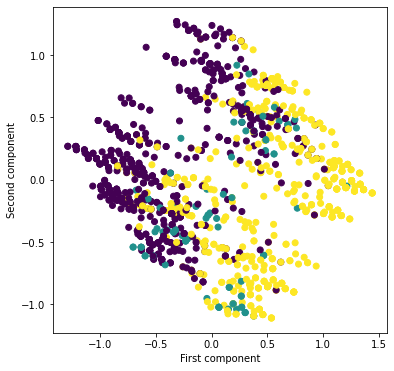

In [18]:
#displaying 2 components of PCA
plt.figure(figsize=(6,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)
plt.xlabel('First component')
plt.ylabel('Second component')

## SOM - Non Linear Dimentionality reduction

In [19]:
from minisom import MiniSom

In [20]:
som = MiniSom( x = 10, y = 10, input_len = 9, sigma = 1.0, learning_rate = 0.5, neighborhood_function='gaussian')

In [21]:
x = x.to_numpy()
som.random_weights_init(x)

In [22]:
som.train_random(data = x, num_iteration = 100)

In [28]:
scaled_y = y.to_numpy()
scaled_y = list(map(int, scaled_y))

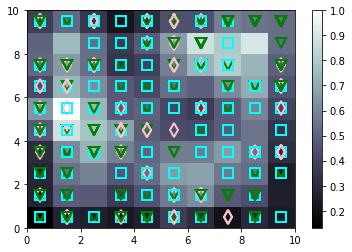

In [29]:
# making a self organization map 
from pylab import bone, pcolor, colorbar, plot, show 
bone() 
pcolor(som.distance_map().T) 
colorbar() 
markers = ["d", "v", "s"] 
colors = ['pink', 'green', 'cyan'] 
for i, x in enumerate(x):
    W = som.winner(x) 
    plot(W[0] + 0.5,
    W[1] + 0.5, markers[y[i]], markeredgecolor = colors [y[i]], markerfacecolor = 'None', markersize = 10,
    markeredgewidth = 2) 
show()

In [30]:
import GEMA

In [31]:
x=df[['SFH','SSLfinal_State','URL_of_Anchor']]
x=x.to_numpy()
x

array([[ 1,  1, -1],
       [-1, -1, -1],
       [ 1,  0, -1],
       ...,
       [-1, -1, -1],
       [ 0,  1,  0],
       [ 1,  1,  1]], dtype=int64)

In [32]:
main_map = GEMA.Map(x, 
                    9, 
                    period=5000, 
                    initial_lr=0.05, 
                    initial_neighbourhood = 0,
                    distance = 'euclidean',
                    use_decay= False,
                    normalization = 'none',
                    presentation= 'random',
                    weights = 'random')

TRAINING...


  0%|          | 0/5000 [00:00<?, ?it/s]

FINISHED.


In [33]:
main_classification = GEMA.Classification(main_map, x)

  0%|          | 0/1353 [00:00<?, ?it/s]

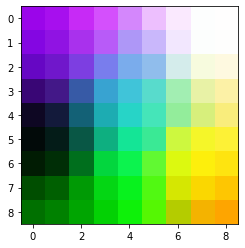

In [34]:
from matplotlib.pyplot import imshow
image_matrix = (main_map.weights-main_map.weights.min())/(main_map.weights.max()-main_map.weights.min())
imshow(image_matrix)